In [26]:
import numpy as np 
import pandas as pd 
from numpy.linalg import norm
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
q1 = "spring"
q2 = "spring"

sentences = ["As spring unfolds, the warmth of the season encourages the first blossoms to open, signaling longer days ahead.",
"Spring brings not only blooming flowers but also the anticipation of sunny days and outdoor activities.",
"With the arrival of spring, people begin planning their summer vacations, eager to enjoy the seasonal warmth.",
"The mild spring weather marks the transition from the cold winter to the inviting warmth of summer.",
"During spring, families often start spending more time outdoors, enjoying the season's pleasant temperatures and the promise of summer fun.",
"Summer continues the season's trend of growth and warmth, with gardens full of life and days filled with sunlight.",
"The summer season is synonymous with outdoor adventures and enjoying the extended daylight hours that began in spring.",
"As summer arrives, the warm weather invites a continuation of the outdoor activities that people began enjoying in spring.",
"The transition into summer brings even warmer temperatures, allowing for beach visits and swimming, much awaited since the spring.",
"Summer vacations are often planned as the days grow longer, a pattern that starts in the spring, culminating in peak summer leisure."
]

In [17]:


def words(sentences):
    vocabulary = set()
    for sentence in sentences:
        tokens = sentence.lower().split()
        vocabulary.update([token.strip('.,') for token in tokens])
    return list(vocabulary)

words = words(sentences)
print(words)

['their', 'longer', 'as', 'with', 'pleasant', 'of', 'summer', 'blooming', 'filled', 'brings', 'promise', 'often', 'starts', 'encourages', 'also', 'began', 'that', 'during', 'trend', 'much', 'to', 'invites', 'winter', 'peak', 'extended', 'grow', 'from', 'and', 'gardens', 'full', 'in', 'warm', 'for', 'leisure', 'activities', 'cold', 'life', 'outdoors', 'synonymous', 'the', 'unfolds', "season's", 'a', 'inviting', 'awaited', 'open', 'growth', 'only', 'begin', 'start', 'eager', 'sunny', 'seasonal', 'is', 'are', 'but', 'temperatures', 'allowing', 'more', 'continues', 'first', 'weather', 'since', 'anticipation', 'visits', 'warmer', 'mild', 'planned', 'not', 'people', 'into', 'arrives', 'arrival', 'blossoms', 'planning', 'season', 'pattern', 'adventures', 'outdoor', 'marks', 'warmth', 'daylight', 'time', 'sunlight', 'swimming', 'hours', 'flowers', 'vacations', 'enjoy', 'spring', 'beach', 'culminating', 'transition', 'spending', 'signaling', 'days', 'fun', 'enjoying', 'families', 'continuation'

In [20]:
def vectorize(sentences, words):
    df = pd.DataFrame(0, index=np.arange(len(sentences)), columns=words)
    # Fill the DataFrame with word counts for each sentence
    for i, sentence in enumerate(sentences):
        tokens = sentence.lower().split()
        # Update counts in the DataFrame
        for token in tokens:
            cleaned_token = token.strip('.,')
            if cleaned_token in df.columns:
                df.loc[i, cleaned_token] += 1
    return df

table = vectorize(sentences, words)
print(table)

   their  longer  as  with  pleasant  of  summer  blooming  filled  brings  \
0      0       1   1     0         0   1       0         0       0       0   
1      0       0   0     0         0   1       0         1       0       1   
2      1       0   0     1         0   1       1         0       0       0   
3      0       0   0     0         0   1       1         0       0       0   
4      0       0   0     0         1   1       1         0       0       0   
5      0       0   0     2         0   2       1         0       1       0   
6      0       0   0     1         0   0       1         0       0       0   
7      0       0   1     0         0   1       1         0       0       0   
8      0       0   0     0         0   0       1         0       0       1   
9      0       1   1     0         0   0       2         0       0       0   

   ...  transition  spending  signaling  days  fun  enjoying  families  \
0  ...           0         0          1     1    0         0       

In [21]:

def cosineSimilarity(vec1, vec2):
    """Calculate the cosine similarity between two vectors"""
    V1 = np.array(vec1)
    V2 = np.array(vec2)
    cosine = np.dot(V1, V2)/(norm(V1)*norm(V2))
    return cosine


In [25]:
cosine_similarities = pd.DataFrame()

# Populate the DataFrame with cosine similarities
for i in range(len(table)):
    for j in range(len(table)):
            cosine_similarities.loc[i, j] = cosineSimilarity(table.iloc[i], table.iloc[j])
            
cosine_similarities

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.306186,0.468293,0.606478,0.348155,0.285774,0.365148,0.400892,0.311805,0.385758
1,0.306186,1.000000,0.229416,0.278543,0.266501,0.300000,0.279508,0.327327,0.272772,0.188982
2,0.468293,0.229416,1.000000,0.553819,0.342381,0.367065,0.359092,0.400501,0.300376,0.346844
3,0.606478,0.278543,0.553819,1.000000,0.435494,0.297113,0.415227,0.486265,0.445742,0.386024
4,0.348155,0.266501,0.342381,0.435494,1.000000,0.341121,0.381385,0.372194,0.372194,0.322329
5,0.285774,0.300000,0.367065,0.297113,0.341121,1.000000,0.313050,0.218218,0.218218,0.188982
6,0.365148,0.279508,0.359092,0.415227,0.381385,0.313050,1.000000,0.536745,0.341565,0.422577
7,0.400892,0.327327,0.400501,0.486265,0.372194,0.218218,0.536745,1.000000,0.285714,0.494872
8,0.311805,0.272772,0.300376,0.445742,0.372194,0.218218,0.341565,0.285714,1.000000,0.288675
9,0.385758,0.188982,0.346844,0.386024,0.322329,0.188982,0.422577,0.494872,0.288675,1.000000


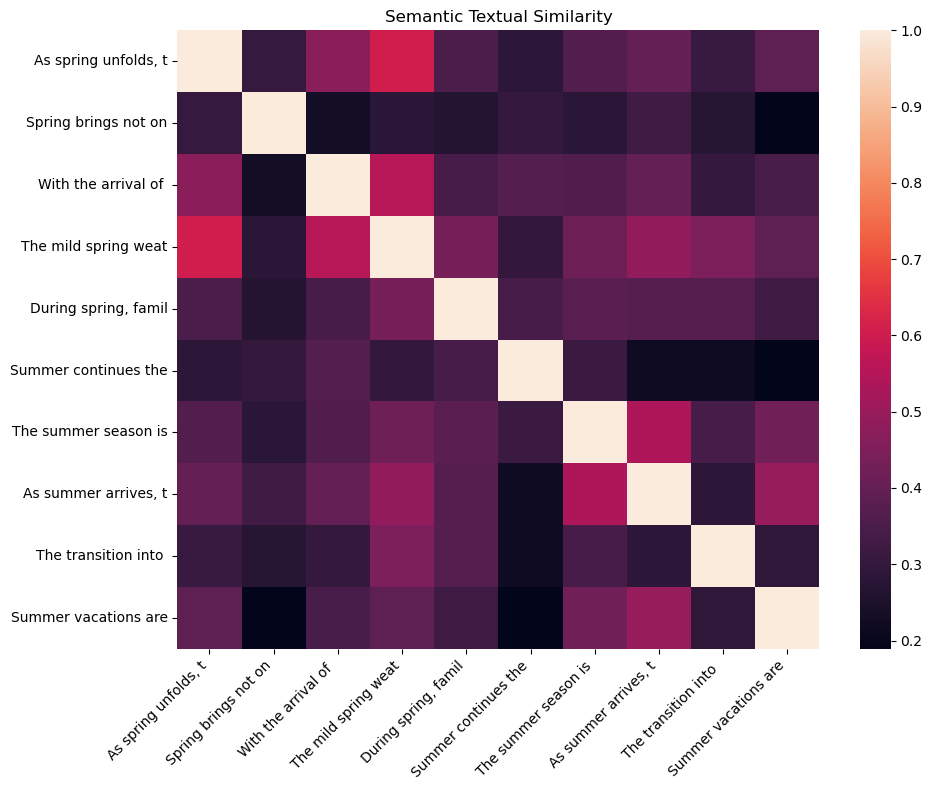

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_similarities, xticklabels=label, yticklabels=label)
label = [sentence[:20]for sentence in sentences]
plt.title('Semantic Textual Similarity')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  
plt.show()